In [2]:
import pkg_resources
pkg_resources.require("scikit-learn==0.24.2")
import sklearn
import nltk
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt, mpld3
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import emoji
import requests  ## for getting data from a server

import graphviz

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/xingyuchen0810/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
filename="data/new_tiktok_google_play_reviews.csv"

df=pd.read_csv(filename)
df = df[df['new_content'].notnull()]

In [5]:
new_df = df[df['new_content'].apply(lambda x: len(x) > 3) & df['new_content'].apply(lambda x: len(x) < 50)]

In [6]:
new_df.head(20)

,content,score,new_content
0,No words,5,word
1,Great fun app so far!,5,great fun app far
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,wish could give percent rating love
4,Pictures and record,5,picture record
5,I love this amazing app,5,love amazing app
6,Mohammed Rehan,5,mohamme rehan
7,Love being on Tik Tok.,5,love tik tok
8,Kwai pelo menos da dinheiro,1,kwai pelo menos da dinheiro
11,Love,5,love
12,Good,5,good


In [7]:
HeadlineLIST= new_df['new_content']
LabelLIST=new_df['score']

In [8]:
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english",
    max_features=50
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
ColumnNames=MyCountV.get_feature_names()
DF_Count=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [9]:
new_df.loc[new_df['score'] == 5, 'score'] = 'very good'
new_df.loc[new_df['score'] == 4, 'score'] = 'good'
new_df.loc[new_df['score'] == 3, 'score'] = 'average'
new_df.loc[new_df['score'] == 2, 'score'] = 'bad'
new_df.loc[new_df['score'] == 1, 'score'] = 'very bad'

In [10]:
new_df = new_df.reset_index()

In [11]:
DF_Count=DF_Count.rename(new_df['score'], axis="index")
print(DF_Count) 

           account  amazing  app  application  awesome  bad  ban  cool  \
very good        0        0    0            0        0    0    0     0   
very good        0        0    1            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   
very good        0        1    1            0        0    0    0     0   
...            ...      ...  ...          ...      ...  ...  ...   ...   
very good        0        0    0            0        0    0    0     0   
very bad         0        0    0            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   

           download  easy  ...  time  tok  update  use  video  view  viral  \
very good         0     0  ...   

In [12]:
DF_Count = DF_Count.reset_index()

In [13]:
DF_Count

,index,account,amazing,app,application,awesome,bad,ban,cool,download,...,time,tok,update,use,video,view,viral,watch,wonderful,work
0,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,very good,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,very good,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354154,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354155,very bad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354156,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354157,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_downsampled = DF_Count.groupby('index').apply(lambda x: x.sample(n=5000))

print(df_downsampled.shape)

(25000, 51)


In [15]:
df_downsampled

index  account  amazing  app  application  awesome  bad  \
index                                                                           
average   288949    average        0        0    0            0        0    0   
          288690    average        0        0    0            0        0    0   
          276934    average        0        0    0            0        0    0   
          131886    average        0        0    1            0        0    0   
          710       average        0        0    0            0        0    0   
...                     ...      ...      ...  ...          ...      ...  ...   
very good 67309   very good        0        0    0            0        0    0   
          105688  very good        0        0    1            0        0    0   
          178145  very good        0        0    0            0        0    0   
          295503  very good        0        0    0            0        0    0   
          58003   very good        0        0    0            0        0    0   

                  ban  cool  download  ...  time  tok  update  use  video  \
index                                  ...                                  
average   288949    0     0         0  ...     0    0       0    0      0   
          288690    0     0         0  ...     0    0       0    0      0   
          276934    0     0         0  ...     0    0       0    0      0   
          131886    0     0         0  ...     0    0       0    0      0   
          710       0     0         0  ...     0    0       0    0      0   
...               ...   ...       ...  ...   ...  ...     ...  ...    ...   
very good 67309     0     0         0  ...     0    0       0    0      0   
          105688    0     0         0  ...     0    0       0    0      0   
          178145    0     0         0  ...     0    0       0    0      0   
          295503    0     0         0  ...     0    0       0    0      0   
          58003     0     0         0  ...     0    0       0    0      0   

                  view  viral  watch  wonderful  work  
index                                                  
average   288949     0      0      0          0     0  
          288690     0      0      0          0     0  
          276934     0      0      0          0     0  
          131886     0      0      0          0     0  
          710        0      0      0          0     0  
...                ...    ...    ...        ...   ...  
very good 67309      0      0      0          0     0  
          105688     0      0      0          0     0  
          178145     0      0      0          0     0  
          295503     0      0      0          0     0  
          58003      0      0      0          0     0  

[25000 rows x 51 columns]

In [16]:
df_downsampled.to_csv('df_count.csv')

In [3]:
filename="df_count.csv"

df=pd.read_csv(filename)
df = df.rename(columns={ df.columns[0]: "LABEL" })
df_tem = df
df_tem = df_tem.drop(['LABEL'], axis = 1)
df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 100], axis=1, inplace=True)
df_tem

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_39924/3291927641.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 100], axis=1, inplace=True)


,account,amazing,app,application,awesome,bad,ban,cool,download,easy,...,tiktok,time,tok,update,use,video,view,viral,watch,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_tem['Label'] = df['LABEL']
df_tem

,account,amazing,app,application,awesome,bad,ban,cool,download,easy,...,time,tok,update,use,video,view,viral,watch,work,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
24996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good


In [6]:
df_tem['Label'].value_counts()

average      5000
bad          5000
good         5000
very bad     5000
very good    5000
Name: Label, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
import random as rd
TrainDF1, TestDF1 = train_test_split(df_tem, test_size=0.2)
# print(TrainDF1)
# print(TestDF1)

       account  amazing  app  application  awesome  bad  ban  cool  download  \
2729         0        0    2            0        0    0    0     0         0   
23853        0        0    0            0        1    0    0     0         0   
6219         0        0    1            0        0    1    0     0         0   
10220        0        0    0            0        0    0    0     0         0   
24634        0        0    0            0        0    0    0     0         0   
...        ...      ...  ...          ...      ...  ...  ...   ...       ...   
7358         1        0    0            0        0    0    0     0         0   
16066        0        0    0            0        0    0    1     0         0   
22011        0        0    0            0        0    0    0     0         0   
23563        0        0    0            0        0    0    0     0         0   
17926        0        0    0            0        0    0    0     0         0   

       easy  ...  time  tok  update  us

In [8]:
Test1Labels=TestDF1["Label"]
print(Test1Labels)
## remove labels
TestDF1 = TestDF1.drop(["Label"], axis=1)
## TRAIN ----------------------------
Train1Labels=TrainDF1["Label"]
## remove labels
TrainDF1 = TrainDF1.drop(["Label"], axis=1)

9725          bad
10537        good
10127        good
12077        good
2775      average
           ...   
5358          bad
12456        good
18548    very bad
16156    very bad
5142          bad
Name: Label, Length: 5000, dtype: object


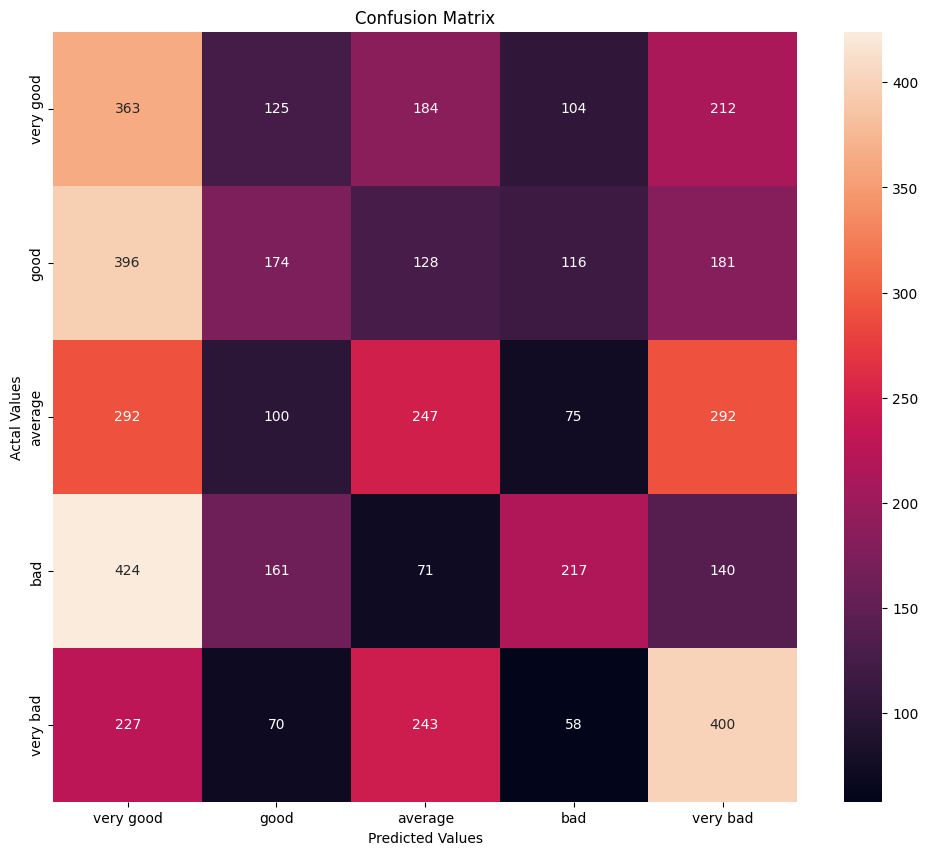

In [106]:
#NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
MyModelNB= MultinomialNB()

NB2=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction2 = MyModelNB.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Index(['account', 'amazing', 'app', 'application', 'awesome', 'bad', 'ban',
       'cool', 'download', 'easy', 'enjoy', 'entertain', 'entertainment',
       'excellent', 'experience', 'fun', 'funny', 'good', 'great', 'help',
       'interesting', 'like', 'lot', 'love', 'make', 'need', 'new', 'nice',
       'people', 'plz', 'problem', 'really', 'star', 'super', 'team', 'thank',
       'thing', 'tik', 'tiktok', 'time', 'tok', 'update', 'use', 'video',
       'view', 'viral', 'watch', 'work'],
      dtype='object')


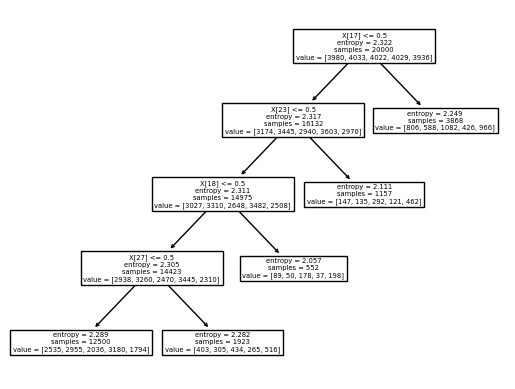

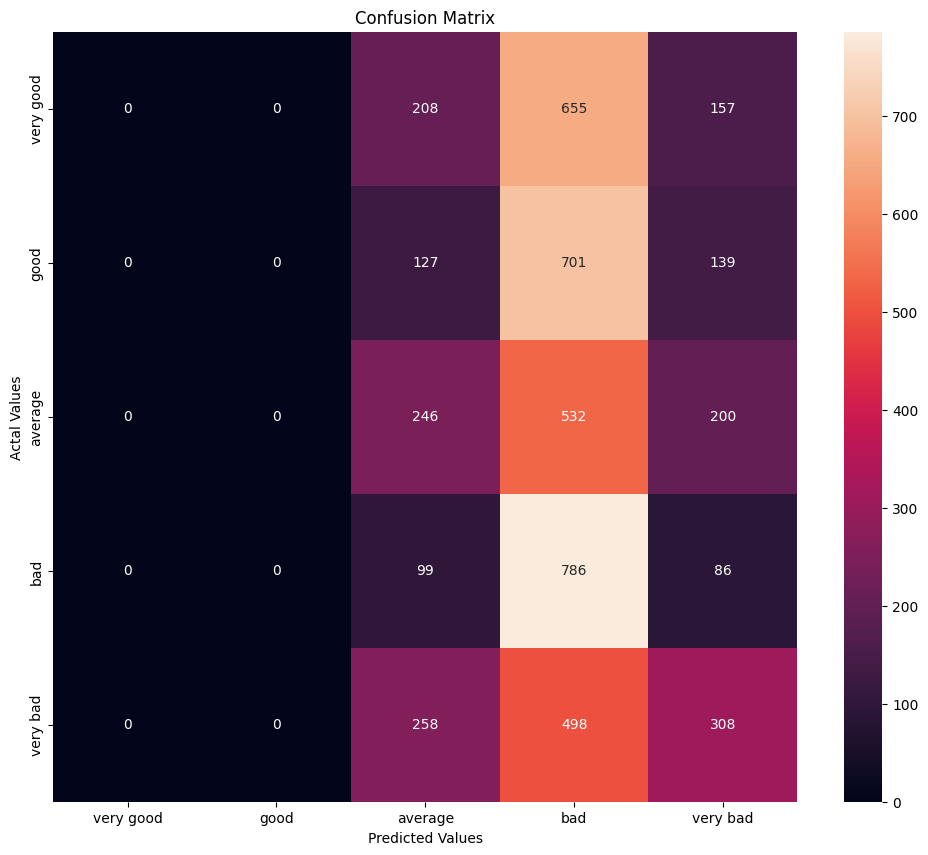

In [9]:
#DT
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=5, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)

## perform DT
MyDT_R.fit(TrainDF1, Train1Labels)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=TrainDF1.columns
print(feature_namesR)

Prediction2 = MyDT_R.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


Index(['account', 'amazing', 'app', 'application', 'awesome', 'bad', 'ban',
       'cool', 'download', 'easy', 'enjoy', 'entertain', 'entertainment',
       'excellent', 'experience', 'fun', 'funny', 'good', 'great', 'help',
       'interesting', 'like', 'lot', 'love', 'make', 'need', 'new', 'nice',
       'people', 'plz', 'problem', 'really', 'star', 'super', 'team', 'thank',
       'thing', 'tik', 'tiktok', 'time', 'tok', 'update', 'use', 'video',
       'view', 'viral', 'watch', 'work'],
      dtype='object')


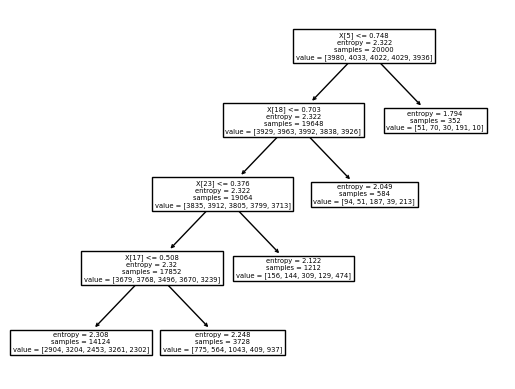

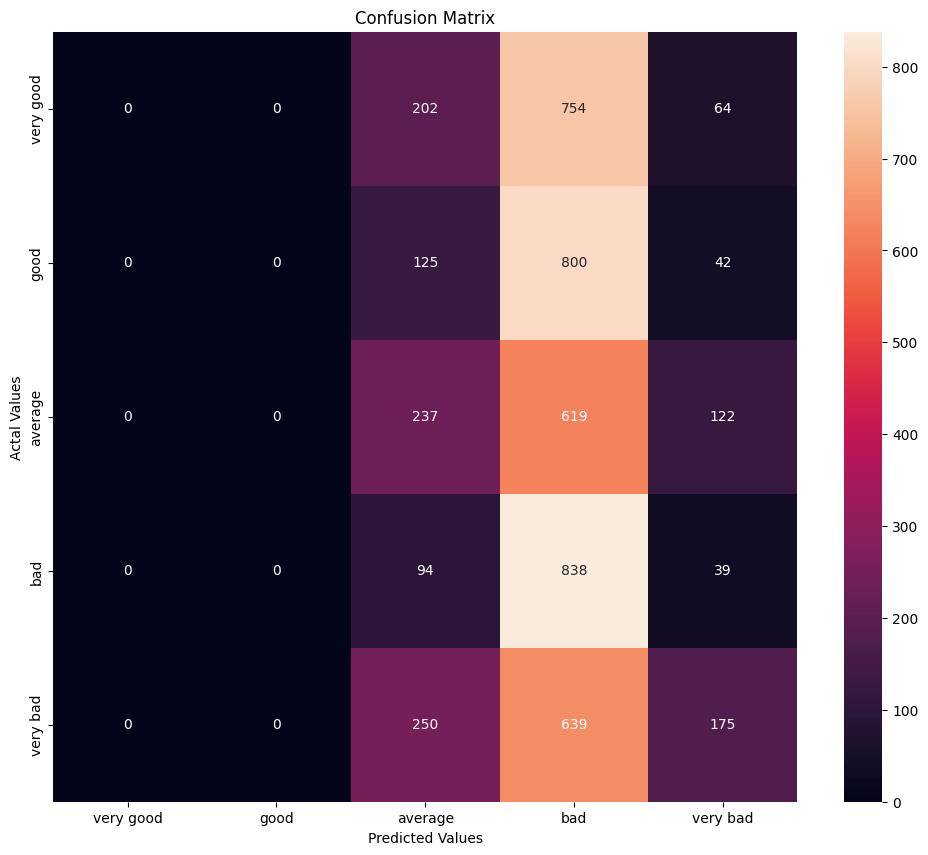

In [11]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='random',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=5, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)

## perform DT
MyDT_R.fit(TrainDF1, Train1Labels)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=TrainDF1.columns
print(feature_namesR)
Prediction2 = MyDT_R.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


Index(['account', 'amazing', 'app', 'application', 'awesome', 'bad', 'ban',
       'cool', 'download', 'easy', 'enjoy', 'entertain', 'entertainment',
       'excellent', 'experience', 'fun', 'funny', 'good', 'great', 'help',
       'interesting', 'like', 'lot', 'love', 'make', 'need', 'new', 'nice',
       'people', 'plz', 'problem', 'really', 'star', 'super', 'team', 'thank',
       'thing', 'tik', 'tiktok', 'time', 'tok', 'update', 'use', 'video',
       'view', 'viral', 'watch', 'work'],
      dtype='object')


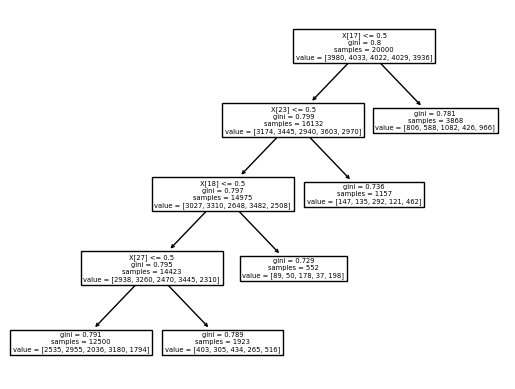

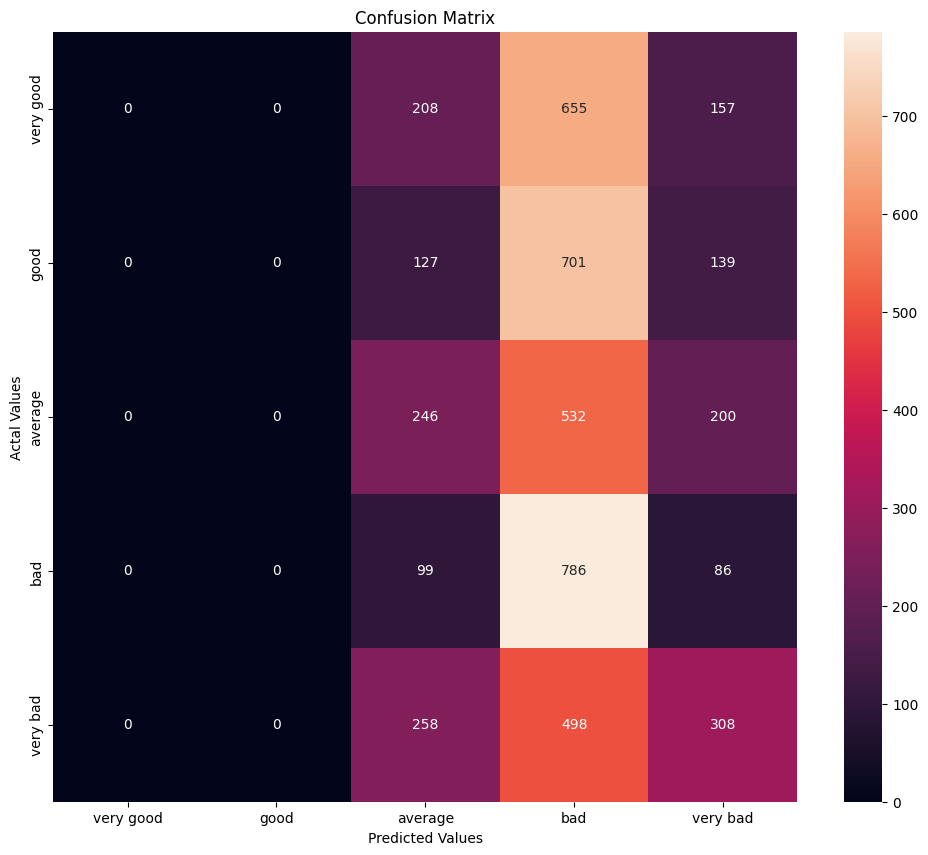

In [12]:


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT_R=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=5, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)

## perform DT
MyDT_R.fit(TrainDF1, Train1Labels)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=TrainDF1.columns
print(feature_namesR)

Prediction2 = MyDT_R.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [126]:
feature_namesR[17]

'great'

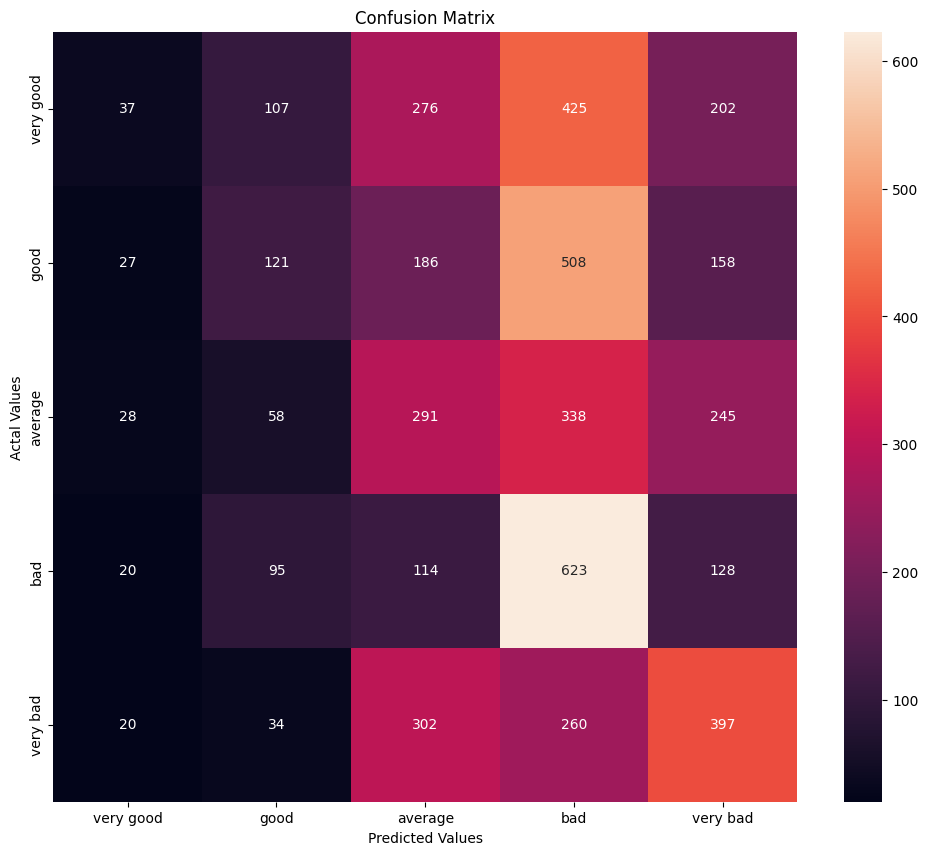

In [39]:
from sklearn.svm import LinearSVC
SVM_Model1=LinearSVC(C=1)
SVM_Model1.fit(TrainDF1, Train1Labels)
Prediction2 = SVM_Model1.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


[LibSVM]....
*
optimization finished, #iter = 4671
obj = -7347.625791, rho = -2.275149
nSV = 7558, nBSV = 7487
....
*
optimization finished, #iter = 4971
obj = -7071.776101, rho = 1.395092
nSV = 7324, nBSV = 7228
...
*.
*
optimization finished, #iter = 4326
obj = -6862.480073, rho = -3.141246
nSV = 7120, nBSV = 7060
....
*
optimization finished, #iter = 4384
obj = -6605.973127, rho = 2.274260
nSV = 6933, nBSV = 6869
...
*.
*.
*
optimization finished, #iter = 5091
obj = -6230.958376, rho = 2.730992
nSV = 6620, nBSV = 6499
...
*.
*
optimization finished, #iter = 4024
obj = -7556.208221, rho = -2.627715
nSV = 7678, nBSV = 7651
...
*.
*
optimization finished, #iter = 4040
obj = -5791.828615, rho = 3.854702
nSV = 6179, nBSV = 6118
...
*..
*
optimization finished, #iter = 5327
obj = -5698.569558, rho = -2.882561
nSV = 6121, nBSV = 6011
...
*.
*
optimization finished, #iter = 4073
obj = -7415.264936, rho = 1.894376
nSV = 7565, nBSV = 7527
...
*.
*
optimization finished, #iter = 4253
obj = -52

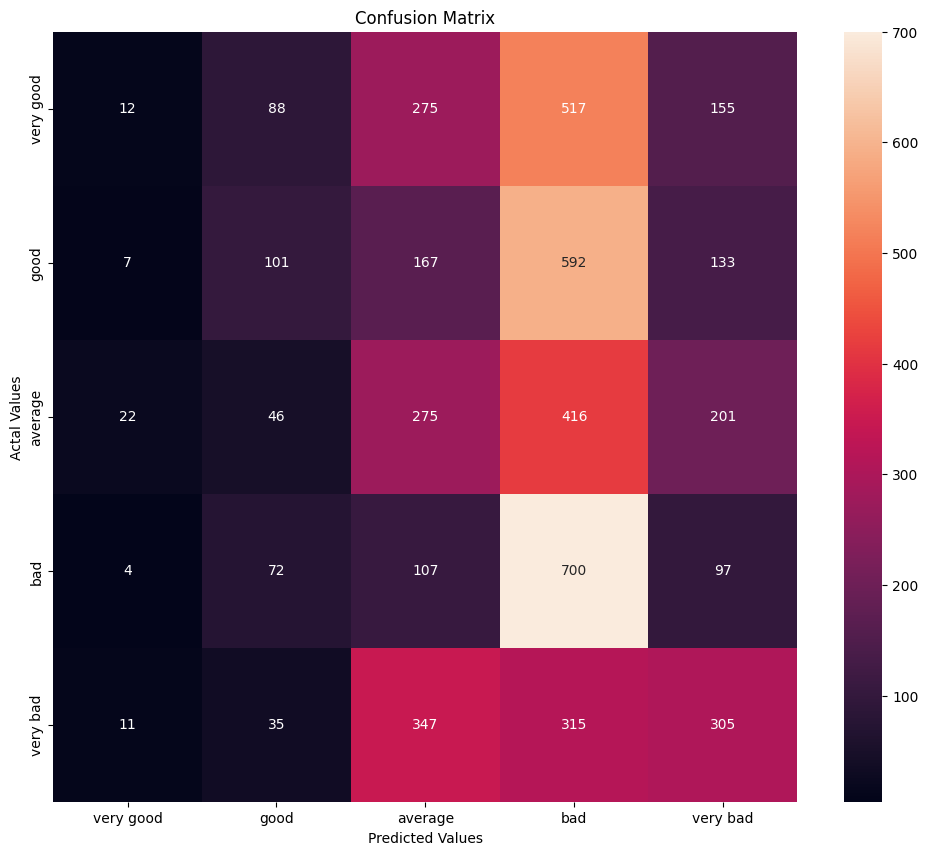

In [28]:


#--------------other kernels
## RBF------------------------------------------
##------------------------------------------------------
SVM_Model2=sklearn.svm.SVC(C=1, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model2.fit(TrainDF1, Train1Labels)



Prediction2 = SVM_Model2.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


[LibSVM]....
*
optimization finished, #iter = 4061
obj = -782046.881818, rho = 0.903918
nSV = 7908, nBSV = 7858
....
*
optimization finished, #iter = 4065
obj = -781741.636911, rho = 0.596885
nSV = 7914, nBSV = 7879
....
*
optimization finished, #iter = 4039
obj = -773133.119212, rho = 0.742413
nSV = 7877, nBSV = 7852
....*
optimization finished, #iter = 4026
obj = -768254.574402, rho = -0.536249
nSV = 7863, nBSV = 7833
....
*
optimization finished, #iter = 4041
obj = -768102.731873, rho = -0.357142
nSV = 7936, nBSV = 7918
....
*
optimization finished, #iter = 4034
obj = -791944.109163, rho = 0.314954
nSV = 7997, nBSV = 7982
...
*
optimization finished, #iter = 3994
obj = -753495.500433, rho = -0.770091
nSV = 7842, nBSV = 7814
...
*
optimization finished, #iter = 3987
obj = -752917.984069, rho = 0.472614
nSV = 7905, nBSV = 7888
....
*
optimization finished, #iter = 4091
obj = -785396.858369, rho = -0.898542
nSV = 7958, nBSV = 7908
....
*
optimization finished, #iter = 4036
obj = -74015

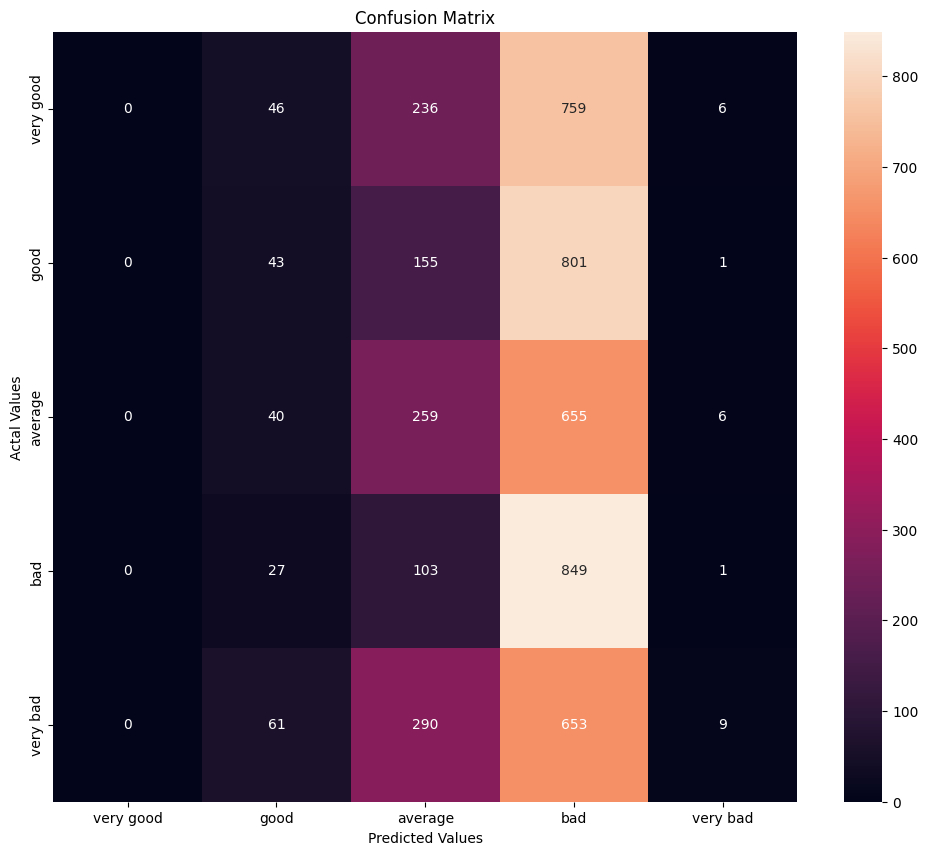

In [29]:


##-----------------------------------------
## POLY
##_--------------------------------------------------
SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly',degree=3,
                           gamma="auto", verbose=True)

#print(SVM_Model3)
SVM_Model3.fit(TrainDF1, Train1Labels)




Prediction2 = SVM_Model3.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
